## Decision Trees 🌳

In [132]:
# import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

In [10]:
# Read our data and fix the columns.
Data = pd.read_csv(r"../Data/car_evaluation.csv")
Data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
# Create X and Y .
x = Data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']].values
y = Data[['class']]


In [13]:
# Normalizing and labeling your data.
buy_label = preprocessing.LabelEncoder()
buy_label.fit(["vhigh","high","med",'low'])
x[:,0] = buy_label.transform(x[:,0])

maint_lable = preprocessing.LabelEncoder()
maint_lable.fit(["vhigh","high",'med',"low"])
x[:,1] = maint_lable.transform(x[:,1])

doors_label = preprocessing.LabelEncoder()
doors_label.fit(["2","3","4",'5more'])
x[:,2] = doors_label.transform(x[:,2])

persons_label = preprocessing.LabelEncoder()
persons_label.fit(["2","4",'more'])
x[:,3] = persons_label.transform(x[:,3])

lug_boot_label = preprocessing.LabelEncoder()
lug_boot_label.fit(["big","med",'small'])
x[:,4] = lug_boot_label.transform(x[:,4])

safety_label = preprocessing.LabelEncoder()
safety_label.fit(["high","med",'low'])
x[:,5] = safety_label.transform(x[:,5])

In [14]:
# Splitting data to train and test.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
# Create a 'DecisionTreeClassifier' object and train it.
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decision_tree.fit(train_x, train_y)


In [135]:
# Predict with test_x and get results.
resulte = decision_tree.predict(test_x)
resulte[:10]

array(['acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc'], dtype=object)

In [137]:
# Accuracy.
print("Accuracy : ", metrics.accuracy_score(test_y, resulte).round(2))

Accuracy :  0.85


## Visualization

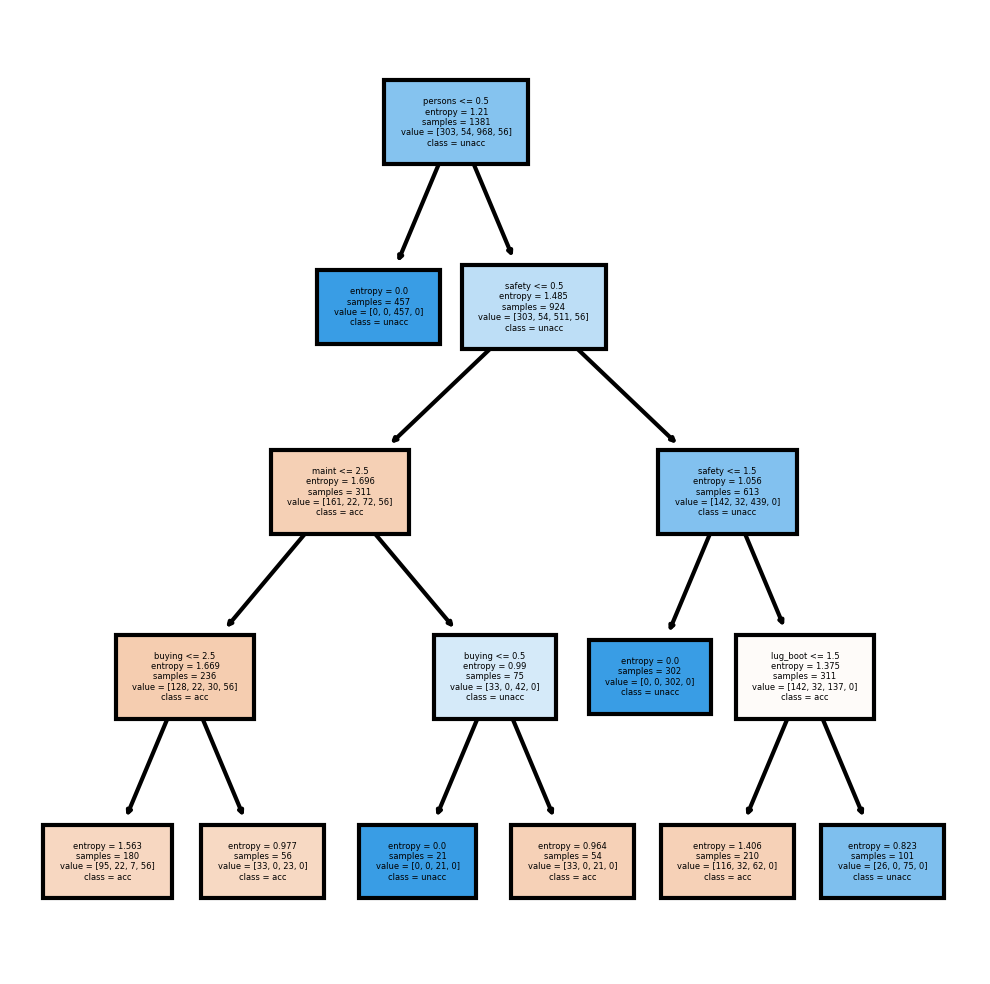

In [131]:
# Plot your tree.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
featureNames = Data.columns[0:6]
tree.plot_tree(decision_tree,
            feature_names = list(featureNames), 
            class_names=list(np.unique(train_y)),
           filled = True,
           fontsize = 2
           )